In [34]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import random
import numpy as np

# Inspecting the data
The flow information is, at this stage not important for my usecase and will thereby be ignored; I'll perform thresholding

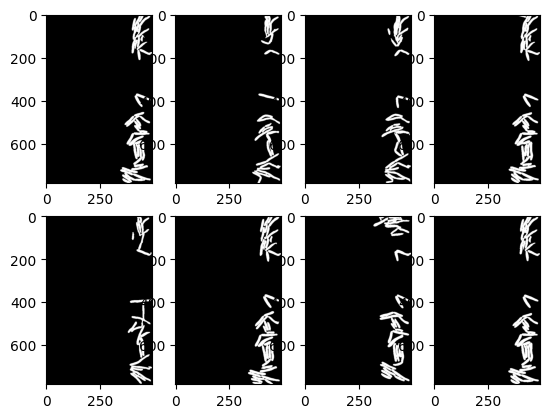

In [121]:
i = 0
paths = []
for i, filepath in enumerate(os.listdir(r'C:\Users\sundi\Desktop\forskn_met\data_december\RIF10_masks201_210\RIF10_masks201_210\Pos211\PreprocessedPhaseMasks')):
    if filepath.endswith('.tif'):
        paths.append(filepath)

some_samples = []

for i in range(0, 8):        
    random_sample = Image.open(paths[random.randint(0,len(paths) - 1)])
    random_sample = np.array(random_sample)
    #print(random_sample.max())
    #print(random_sample.min())
    random_sample = random_sample > 0
    some_samples.append(random_sample)

f, a = plt.subplots(2, 4)
a = a.ravel()
for i in range(0, 8):    
    a[i].imshow(some_samples[i], cmap='gray')       


In [65]:
data_path = r'C:\Users\sundi\Desktop\forskn_met\data_december'
for folder in os.listdir(data_path):
    print(data_path + "\\" + folder)

C:\Users\sundi\Desktop\forskn_met\data_december\Analysis_zipped
C:\Users\sundi\Desktop\forskn_met\data_december\REF_masks101_110
C:\Users\sundi\Desktop\forskn_met\data_december\REF_raw_data101_110
C:\Users\sundi\Desktop\forskn_met\data_december\RIF10_masks201_210
C:\Users\sundi\Desktop\forskn_met\data_december\RIF10_raw_data201_210


In [139]:
raw_images = []
raw_data_101 = "C:\\Users\\sundi\\Desktop\\forskn_met\\data_december\\REF_raw_data101_110\\REF_raw_data101_110"
masks_101 = "C:\\Users\\sundi\\Desktop\\forskn_met\\data_december\\REF_masks101_110\\REF_masks101_110"

image_folders = []
mask_folders = []

for folder in os.listdir(raw_data_101):
    if folder.endswith(".DS_Store"):
        continue
    path = raw_data_101 + "\\" + folder
    #print(path)
    image_folders.append(path)

for folder in os.listdir(masks_101):
    if folder.endswith(".DS_Store"):
        continue
    path = masks_101 + "\\" + folder
    #print(path)
    mask_folders.append(path)

full_image_paths = []
full_mask_paths = []

for folder in image_folders:
    folder = folder + "\\aphase"
    for image_path in os.listdir(folder):
        full_image_paths.append(folder + "\\" + image_path)

for folder in mask_folders:
    folder = folder + "\\PreprocessedPhaseMasks"
    for mask_path in os.listdir(folder):
        if mask_path.endswith(".tif"):
            full_mask_paths.append(folder + "\\" + mask_path)

print(len(full_mask_paths) == len(full_image_paths))
print(len(full_image_paths))

True
1210


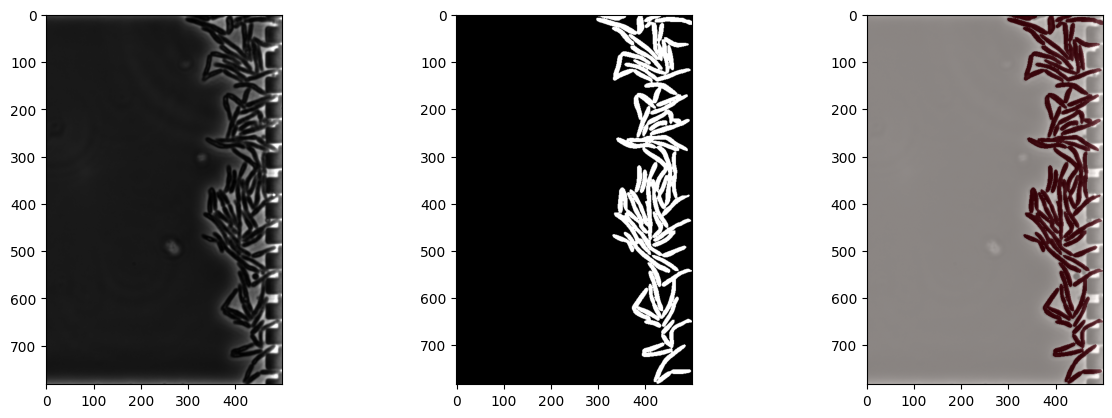

In [141]:
sample_no = random.randint(0, len(full_image_paths))

raw_image = Image.open(full_image_paths[sample_no])
mask = Image.open(full_mask_paths[sample_no])
mask = np.array(mask)
mask = mask > 0


f, a = plt.subplots(1, 3)
f.set_figwidth(15)
a[0].imshow(raw_image, cmap='gray')
a[1].imshow(mask, cmap='gray')
a[2].imshow(raw_image, cmap='gray')       
a[2].imshow(mask ,cmap='Reds',alpha=0.5)

In [149]:
print(len(full_image_paths))
print(full_image_paths)

1210
['C:\\Users\\sundi\\Desktop\\forskn_met\\data_december\\REF_raw_data101_110\\REF_raw_data101_110\\Pos101\\aphase\\img_000000000.tiff', 'C:\\Users\\sundi\\Desktop\\forskn_met\\data_december\\REF_raw_data101_110\\REF_raw_data101_110\\Pos101\\aphase\\img_000000001.tiff', 'C:\\Users\\sundi\\Desktop\\forskn_met\\data_december\\REF_raw_data101_110\\REF_raw_data101_110\\Pos101\\aphase\\img_000000002.tiff', 'C:\\Users\\sundi\\Desktop\\forskn_met\\data_december\\REF_raw_data101_110\\REF_raw_data101_110\\Pos101\\aphase\\img_000000003.tiff', 'C:\\Users\\sundi\\Desktop\\forskn_met\\data_december\\REF_raw_data101_110\\REF_raw_data101_110\\Pos101\\aphase\\img_000000004.tiff', 'C:\\Users\\sundi\\Desktop\\forskn_met\\data_december\\REF_raw_data101_110\\REF_raw_data101_110\\Pos101\\aphase\\img_000000005.tiff', 'C:\\Users\\sundi\\Desktop\\forskn_met\\data_december\\REF_raw_data101_110\\REF_raw_data101_110\\Pos101\\aphase\\img_000000006.tiff', 'C:\\Users\\sundi\\Desktop\\forskn_met\\data_december\\R

In [151]:
import shutil

new_loc = "C:\\Users\\sundi\\Desktop\\forskn_met\\data_december"

images_out = os.path.join(new_loc, "images")
masks_out  = os.path.join(new_loc, "masks")
os.makedirs(images_out, exist_ok=True)
os.makedirs(masks_out,  exist_ok=True)

for src in full_image_paths:
    grandparent = os.path.basename(os.path.dirname(os.path.dirname(src)))
    orig_name   = os.path.basename(src)                       # e.g. "image_001.tif"
    new_name    = f"{grandparent}_{orig_name}"                # 101_image_001.tif
    
    shutil.copy2(src, os.path.join(images_out, new_name))

for src in full_mask_paths:
    grandparent = os.path.basename(os.path.dirname(os.path.dirname(src)))
    orig_name   = os.path.basename(src)
    new_name    = f"{grandparent}_{orig_name}"
    
    shutil.copy2(src, os.path.join(masks_out, new_name))


In [152]:
print(os.listdir(new_loc + "\\images"))
print(len(os.listdir(new_loc + "\\images")))
print(len(os.listdir(new_loc + "\\images")) == len(os.listdir(new_loc + "\\masks")))

['Pos101_img_000000000.tiff', 'Pos101_img_000000001.tiff', 'Pos101_img_000000002.tiff', 'Pos101_img_000000003.tiff', 'Pos101_img_000000004.tiff', 'Pos101_img_000000005.tiff', 'Pos101_img_000000006.tiff', 'Pos101_img_000000007.tiff', 'Pos101_img_000000008.tiff', 'Pos101_img_000000009.tiff', 'Pos101_img_000000010.tiff', 'Pos101_img_000000011.tiff', 'Pos101_img_000000012.tiff', 'Pos101_img_000000013.tiff', 'Pos101_img_000000014.tiff', 'Pos101_img_000000015.tiff', 'Pos101_img_000000016.tiff', 'Pos101_img_000000017.tiff', 'Pos101_img_000000018.tiff', 'Pos101_img_000000019.tiff', 'Pos101_img_000000020.tiff', 'Pos101_img_000000021.tiff', 'Pos101_img_000000022.tiff', 'Pos101_img_000000023.tiff', 'Pos101_img_000000024.tiff', 'Pos101_img_000000025.tiff', 'Pos101_img_000000026.tiff', 'Pos101_img_000000027.tiff', 'Pos101_img_000000028.tiff', 'Pos101_img_000000029.tiff', 'Pos101_img_000000030.tiff', 'Pos101_img_000000031.tiff', 'Pos101_img_000000032.tiff', 'Pos101_img_000000033.tiff', 'Pos101_img_0

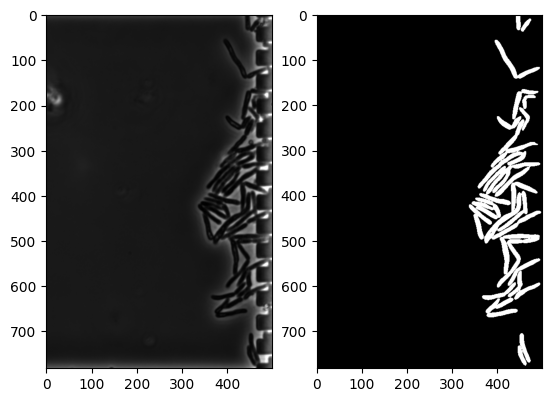

In [172]:
sample_no = random.randint(0, len(full_image_paths))
image_base_path = "C:\\Users\\sundi\\Desktop\\forskn_met\\data_december\\data_12_04\\images\\"
mask_base_path = "C:\\Users\\sundi\\Desktop\\forskn_met\\data_december\\data_12_04\\masks\\"
images = os.listdir(r"C:\Users\sundi\Desktop\forskn_met\data_december\data_12_04\images")
masks = os.listdir(r"C:\Users\sundi\Desktop\forskn_met\data_december\data_12_04\masks")

f, a = plt.subplots(1,2)
a[0].imshow(Image.open(image_base_path + images[sample_no]), cmap="gray")
mask = np.array(Image.open(mask_base_path + masks[sample_no])) > 0

a[1].imshow(mask , cmap="gray")